##Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os
spark = SparkSession.builder.appName('TechProject').getOrCreate()

In [0]:
!apt update
!apt install gcc python-dev libkrb5-dev -y
# The OS module in python provides functions for interacting with the operating system. OS, comes under Python's standard utility modules. This module provides a portable way of using operating system dependent functionality
os.environ['SPARK_HOME'] = "/content/spark-3.0.2-bin-hadoop3.2"

# PySpark is the Python API written in python to support Apache Spark.
# Apache Spark is written in Scala and can be integrated with Python, Scala, Java, R, SQL languages
import pyspark
# SQLContext is a class and is used for initializing the functionalities of Spark SQL. 
# SparkContext class object (sc) is required for initializing SQLContext class object.
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [0]:
# File location and type
file_location = "/FileStore/tables/data.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
fifa = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

#Viewing the data
display(fifa)

_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",null,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",null,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",null,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",null,2020,6'4,168lbs,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",null,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4,4,4,High/ Medium,Normal,Yes,LF,10,"Jul 1, 2012",null,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,11,12,6,8,8,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,€67M,€420K,2280,Right,4,4,4,High/ High,

#Section-1: Predicting the Overall score

In [0]:
#Converting the spark dataframe to pandas dataframe to model the data via both
ff = fifa.toPandas()
ff.head()

,_c0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",None,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",None,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",None,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",None,2020,6'4,168lbs,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",None,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M


Preprocessing the data

In [0]:
#Dropping irrelevant columns

drop_cols = ff.columns[28:54]
ff = ff.drop(drop_cols, axis = 1)
ff = ff.drop(['_c0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)
ff = ff.dropna()
ff.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5,4,4,Medium/ Medium,Yes,RF,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8
1,33,Portugal,94,94,Right,5,4,5,High/ Low,Yes,ST,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11
2,26,Brazil,92,93,Right,5,5,5,High/ Medium,Yes,LW,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11
3,27,Spain,91,93,Right,4,3,1,Medium/ Medium,Yes,GK,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94
4,27,Belgium,91,92,Right,4,5,4,High/ High,Yes,RCM,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13


In [0]:
#Converting Real Face into values

def face_to_num(ff):
    if(ff['Real Face'] == 'Yes'):
        return 1
    else:
        return 0

#Converting Preferred foot record to values

def foot(ff):
    if(ff['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

In [0]:
# Creating a simplified position variable by combining different positions

def simple_position(ff):
    if (ff['Position'] == 'GK'):
        return 'GK'
    elif ((ff['Position'] == 'RB') or (ff['Position'] == 'LB') or (ff['Position'] == 'CB') or (ff['Position'] == 'LCB') or (ff['Position'] == 'RCB') or (ff['Position'] == 'RWB') or (ff['Position'] == 'LWB')):
        return 'DF'
    elif ((ff['Position'] == 'LDM') or (ff['Position'] == 'CDM') or (ff['Position'] == 'RDM')):
        return 'DM'
    elif ((ff['Position'] == 'LM') or (ff['Position'] == 'LCM') or (ff['Position'] == 'CM') or (ff['Position'] == 'RCM') or (ff['Position'] == 'RM')):
        return 'MF'
    elif ((ff['Position'] == 'LAM') or (ff['Position'] == 'CAM') or (ff['Position'] == 'RAM') or (ff['Position'] == 'LW') or (ff['Position'] == 'RW')):
        return 'AM'
    elif ((ff['Position'] == 'RS') or (ff['Position'] == 'ST') or (ff['Position'] == 'LS') or (ff['Position'] == 'CF') or (ff['Position'] == 'LF') or (ff['Position'] == 'RF')):
        return 'ST'
    else:
        return ff.Position

In [0]:
#Making list of those nations with more then 250 players

nat_count = ff.Nationality.value_counts()
nat_list = nat_count[nat_count > 250].index.tolist()

def major_nation(ff):
    if(ff.Nationality in nat_list):
        return 1
    else:
        return 0

In [0]:
#Creating a copy to avoid indexing error
ff1 = ff.copy()

Transforming the data

In [0]:
#Applying changes to dataset to create new columns

ff1['Real_Face'] = ff1.apply(face_to_num, axis = 1)
ff1['Right_Footed'] = ff1.apply(foot, axis = 1)
ff1['Simple_Position'] = ff1.apply(simple_position, axis = 1)
ff1['Nation'] = ff1.apply(major_nation, axis = 1)

In [0]:
#Splitting the Team Work column

tempwork = ff1['Work Rate'].str.split('/', n = 1, expand = True)

ff1['Workrate1'] = tempwork[0]
ff1['Workrate2'] = tempwork[1]

In [0]:
#Droping the original columns

ff1 = ff1.drop(['Work Rate', 'Preferred Foot', 'Real Face', 'Position', 'Nationality'], axis = 1)
ff1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Footed,Simple_Position,Nation,Workrate1,Workrate2
0,31,94,94,5,4,4,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,1,0,ST,1,Medium,Medium
1,33,94,94,5,4,5,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,1,1,ST,1,High,Low
2,26,92,93,5,5,5,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,1,1,AM,1,High,Medium
3,27,91,93,4,3,1,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,1,1,GK,1,Medium,Medium
4,27,91,92,4,5,4,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,1,1,MF,1,High,High


In [0]:
#Spliting ID
target = ff1.Overall
ff2 = ff1.drop(['Overall'], axis = 1)

Test-Train Split and One Hot Encoding

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Splitting dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(ff2, target, test_size = 0.2, random_state = 0)

# Applying One hot encoding to ignore the missing values in the train set while applying Random Forest Regressor
ohe=OneHotEncoder(handle_unknown='ignore')
x_train=ohe.fit_transform(x_train)
x_test=ohe.transform(x_test)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#creating object of RandomForestRegressor class
random = RandomForestRegressor()

#calling the fit method on the regressor object
random.fit(x_train, y_train)

#predicting the test set results
y_pred = random.predict(x_test)

# Printing the R2 score based on test set
print('R2 score: '+str(r2_score(y_test, y_pred)))

meanSquaredError=mean_squared_error(y_test, y_pred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

/databricks/python/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
 "10 in version 0.20 to 100 in 0.22.", FutureWarning)
R2 score: 0.8731385510612438
MSE: 5.991369146005511
RMSE: 2.447727343068568

#Section-2: Clustering of Players by Position Group

Data Preparation

In [0]:
# Renaming the columns as SelectExpr won't consider spaces

fifa = fifa.withColumnRenamed("Club Logo","ClubLogo")
fifa = fifa.withColumnRenamed("Preferred Foot","PreferredFoot")
fifa = fifa.withColumnRenamed("International Reputation","InternationalReputation")
fifa = fifa.withColumnRenamed("Weak Foot","WeakFoot")
fifa = fifa.withColumnRenamed("Skill Moves","SkillMoves")
fifa = fifa.withColumnRenamed("Work Rate","WorkRate")
fifa = fifa.withColumnRenamed("Body Type","BodyType")
fifa = fifa.withColumnRenamed("Real Face","RealFace")
fifa = fifa.withColumnRenamed("Jersey Number","JerseyNumber")
fifa = fifa.withColumnRenamed("Loaned From","LoanedFrom")
fifa = fifa.withColumnRenamed("Contract Valid Until","ContractValidUntil")
fifa = fifa.withColumnRenamed("Release Clause","ReleaseClause")

# Converting the relevant columns to Integer for data processing

df = fifa.selectExpr("cast(ID as int) ID","Name","cast(Age as int) Age","Photo", "Nationality", "Flag","cast(Overall as int) Overall","cast(Potential as int) Potential", "Club", "ClubLogo","Value", "cast(Wage as int) Wage", "cast(Special as int) Special","PreferredFoot","InternationalReputation","WeakFoot","SkillMoves","WorkRate","BodyType","RealFace","Position","JerseyNumber","Joined","LoanedFrom","ContractValidUntil","Height","Weight","LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB","LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB","cast(Crossing as int) Crossing", "cast(Finishing as int) Finishing", "cast(HeadingAccuracy as int) HeadingAccuracy","cast(ShortPassing as int) ShortPassing","cast(Volleys as int) Volleys","cast(Dribbling as int) Dribbling","cast(Curve as int) Curve","cast(FKAccuracy as int) FKAccuracy","cast(LongPassing as int) LongPassing","cast(BallControl as int) BallControl","cast(Acceleration as int) Acceleration","cast(SprintSpeed as int) SprintSpeed","cast(Agility as int) Agility","cast(Reactions as int) Reactions","cast(Balance as int) Balance","cast(ShotPower as int) ShotPower","cast(Jumping as int) Jumping","cast(Stamina as int) Stamina","cast(Strength as int) Strength","cast(LongShots as int) LongShots","cast(Aggression as int) Aggression","cast(Interceptions as int) Interceptions","cast(Positioning as int) Positioning","cast(Vision as int) Vision","cast(Penalties as int) Penalties","cast(Composure as int) Composure","cast(Marking as int) Marking","cast(StandingTackle as int) StandingTackle","cast(SlidingTackle as int) SlidingTackle","cast(GKDiving as int) GKDiving","cast(GKHandling as int) GKHandling","cast(GKKicking as int) GKKicking","cast(GKPositioning as int) GKPositioning","cast(GKReflexes as int) GKReflexes")

# Dropping the rows for which column value is null
df.na.drop("all")

# Printing the new schema for df
df.printSchema()

root
-- ID: integer (nullable = true)
-- Name: string (nullable = true)
-- Age: integer (nullable = true)
-- Photo: string (nullable = true)
-- Nationality: string (nullable = true)
-- Flag: string (nullable = true)
-- Overall: integer (nullable = true)
-- Potential: integer (nullable = true)
-- Club: string (nullable = true)
-- ClubLogo: string (nullable = true)
-- Value: string (nullable = true)
-- Wage: integer (nullable = true)
-- Special: integer (nullable = true)
-- PreferredFoot: string (nullable = true)
-- InternationalReputation: string (nullable = true)
-- WeakFoot: string (nullable = true)
-- SkillMoves: string (nullable = true)
-- WorkRate: string (nullable = true)
-- BodyType: string (nullable = true)
-- RealFace: string (nullable = true)
-- Position: string (nullable = true)
-- JerseyNumber: string (nullable = true)
-- Joined: string (nullable = true)
-- LoanedFrom: string (nullable = true)
-- ContractValidUntil: string (nullable = true)
-- Height: string (nullable = true)
-- Weight: string (nullable = true)
-- LS: string (nullable = true)
-- ST: string (nullable = true)
-- RS: string (nullable = true)
-- LW: string (nullable = true)
-- LF: string (nullable = true)
-- CF: string (nullable = true)
-- RF: string (nullable = true)
-- RW: string (nullable = true)
-- LAM: string (nullable = true)
-- CAM: string (nullable = true)
-- RAM: string (nullable = true)
-- LM: string (nullable = true)
-- LCM: string (nullable = true)
-- CM: string (nullable = true)
-- RCM: string (nullable = true)
-- RM: string (nullable = true)
-- LWB: string (nullable = true)
-- LDM: string (nullable = true)
-- CDM: string (nullable = true)
-- RDM: string (nullable = true)
-- RWB: string (nullable = true)
-- LB: string (nullable = true)
-- LCB: string (nullable = true)
-- CB: string (nullable = true)
-- RCB: string (nullable = true)
-- RB: string (nullable = true)
-- Crossing: integer (nullable = true)
-- Finishing: integer (nullable = true)
-- HeadingAccuracy: integer (nullable = true)
-- ShortPassing: integer (nullable = true)
-- Volleys: integer (nullable = true)
-- Dribbling: integer (nullable = true)
-- Curve: integer (nullable = true)
-- FKAccuracy: integer (nullable = true)
-- LongPassing: integer (nullable = true)
-- BallControl: integer (nullable = true)
-- Acceleration: integer (nullable = true)
-- SprintSpeed: integer (nullable = true)
-- Agility: integer (nullable = true)
-- Reactions: integer (nullable = true)
-- Balance: integer (nullable = true)
-- ShotPower: integer (nullable = true)
-- Jumping: integer (nullable = true)
-- Stamina: integer (nullable = true)
-- Strength: integer (nullable = true)
-- LongShots: integer (nullable = true)
-- Aggression: integer (nullable = true)
-- Interceptions: integer (nullable = true)
-- Positioning: integer (nullable = true)
-- Vision: integer (nullable = true)
-- Penalties: integer (nullable = true)
-- Composure: integer (nullable = true)
-- Marking: integer (nullable = true)
-- StandingTackle: integer (nullable = true)
-- SlidingTackle: integer (nullable = true)
-- GKDiving: integer (nullable = true)
-- GKHandling: integer (nullable = true)
-- GKKicking: integer (nullable = true)
-- GKPositioning: integer (nullable = true)
-- GKReflexes: integer (nullable = true)

Data Exploration by performing basic analytics for gaining insight in the data

In [0]:
from pyspark.sql import functions as F
import pyspark.sql.functions as F

#Statistics on Age 
print("Minimum Age :")
df.select(F.min('Age')).show()

print("Mean Age :")
df.select(F.mean('Age')).show()

print("Maximum Age :")
df.select(F.max('Age')).show()

Minimum Age :
+--------+
min(Age)|
+--------+
 16|
+--------+

Mean Age :
+------------------+
 avg(Age)|
+------------------+
25.122205745043114|
+------------------+

Maximum Age :
+--------+
max(Age)|
+--------+
 45|
+--------+

In [0]:
print("Minimum of Overall :")
df.select(F.min('Overall')).show()

print("Mean of Overall :")
df.select(F.mean('Overall')).show()

print("Maximum of Overall :")
df.select(F.max('Overall')).show()

Minimum of Overall :
+------------+
min(Overall)|
+------------+
 46|
+------------+

Mean of Overall :
+-----------------+
 avg(Overall)|
+-----------------+
66.23869940132916|
+-----------------+

Maximum of Overall :
+------------+
max(Overall)|
+------------+
 94|
+------------+

In [0]:
dfpo = df.select("Position","Overall")

In [0]:
display(dfpo)

Position,Overall
RF,94
ST,94
LW,92
GK,91
RCM,91
LF,91
RCM,91
RS,91
RCB,91
GK,90


In [0]:
df.groupBy("Nationality").agg(F.mean('Overall')).sort("avg(Overall)", ascending=False).show(5)

+--------------------+-----------------+
 Nationality| avg(Overall)|
+--------------------+-----------------+
United Arab Emirates| 77.0|
Central African Rep.|73.33333333333333|
 Israel|72.14285714285714|
 Dominican Republic| 72.0|
 Oman| 72.0|
+--------------------+-----------------+
only showing top 5 rows

In [0]:
df1 = df.groupBy("Nationality","Position").agg(F.mean('Potential')).orderBy("Nationality",descending=False)
df1.show(10)

+-----------+--------+-----------------+
Nationality|Position| avg(Potential)|
+-----------+--------+-----------------+
Afghanistan| LM| 70.0|
Afghanistan| CAM| 66.0|
Afghanistan| LB| 64.0|
Afghanistan| CM| 71.0|
 Albania| RS| 71.0|
 Albania| CDM| 69.5|
 Albania| CAM| 70.75|
 Albania| GK| 77.5|
 Albania| LDM|72.66666666666667|
 Albania| RCB| 68.0|
+-----------+--------+-----------------+
only showing top 10 rows

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

X = df.groupBy("Age").agg(F.mean('Potential'))
X.show(100)

+---+-----------------+
Age| avg(Potential)|
+---+-----------------+
 31|69.85007072135785|
 34|69.53960396039604|
 28| 69.4441416893733|
 26|70.17664023071377|
 27| 69.7091222030981|
 44| 50.5|
 22|72.81940298507463|
 16|73.19047619047619|
 40| 67.6923076923077|
 20|73.21370967741936|
 19| 73.146484375|
 41| 67.6|
 37| 68.9390243902439|
 17|74.33910034602076|
 35|68.13265306122449|
 23|72.55555555555556|
 39| 67.64|
 45| 71.0|
 38|67.37837837837837|
 25|71.29037149355572|
 24|72.07952871870398|
 29|69.35766423357664|
 21|72.95783555867885|
 32|69.52961672473867|
 33|69.55882352941177|
 42| 65.0|
 30|69.70010905125409|
 18|73.53005464480874|
 36|67.93700787401575|
+---+-----------------+

In [0]:
age =[31,34,28,26,27,44,22,16,40,20,19,41,37,17,35,23,39,45,38,25,24,29,21,32,33,42,30,18,36]
avg_pot = [69.85007072135785, 69.53960396039604, 69.4441416893733, 70.17664023071377, 69.7091222030981, 50.5, 72.81940298507463, 73.19047619047619, 67.6923076923077, 73.21370967741936, 73.146484375, 67.6, 68.9390243902439, 74.33910034602076, 68.13265306122449, 72.55555555555556,67.64, 71.0, 67.37837837837837, 71.29037149355572, 72.07952871870398, 69.35766423357664, 72.95783555867885, 69.52961672473867, 69.55882352941177, 65.0, 69.70010905125409, 73.53005464480874, 67.93700787401575]

len(age), len(avg_pot)

d = {'Age': age,'avg(Potential)': avg_pot}
dss = pd.DataFrame(d)

dss.sort_values(by=['Age'], inplace=True)

In [0]:
display(dss)

Age,avg(Potential)
16,73.19047619047619
17,74.33910034602076
18,73.53005464480874
19,73.146484375
20,73.21370967741936
21,72.95783555867885
22,72.81940298507463
23,72.55555555555556
24,72.07952871870398
25,71.29037149355572


In [0]:
Y = df.groupBy("Age").agg(F.mean('Overall'))
Y.show(30)

+---+------------------+
Age| avg(Overall)|
+---+------------------+
 31| 69.85007072135785|
 34| 69.53960396039604|
 28| 69.21344232515895|
 26| 68.51478010093727|
 27| 68.94922547332186|
 44| 50.5|
 22| 64.99402985074627|
 16| 54.45238095238095|
 40| 67.6923076923077|
 20|61.858870967741936|
 19| 59.5830078125|
 41| 67.6|
 37| 68.9390243902439|
 17| 56.40484429065744|
 35| 68.13265306122449|
 23| 66.24474474474475|
 39| 67.64|
 45| 71.0|
 38| 67.37837837837837|
 25| 67.97346474601972|
 24| 67.30633284241532|
 29| 69.2460896767466|
 21| 63.48067463106114|
 32| 69.52961672473867|
 33| 69.55882352941177|
 42| 65.0|
 30| 69.69574700109051|
 18| 57.74180327868852|
 36| 67.93700787401575|
+---+------------------+

In [0]:
avg_ovr = [69.85007072135785, 69.53960396039604, 69.21344232515895, 68.51478010093727, 68.94922547332186, 50.5, 64.99402985074627, 54.45238095238095,
          67.6923076923077, 61.858870967741936, 59.5830078125, 67.6, 68.9390243902439, 56.40484429065744, 68.13265306122449, 66.24474474474475, 67.64, 71.0, 67.37837837837837, 67.97346474601972, 67.30633284241532, 69.2460896767466, 63.48067463106114, 69.52961672473867, 69.55882352941177,65.0, 69.69574700109051, 57.74180327868852, 67.93700787401575]

d = {'Age': age,'avg(Overall)': avg_ovr}
ds = pd.DataFrame(d)

ds.sort_values(by=['Age'], inplace=True)

In [0]:
display(ds)

Age,avg(Overall)
16,54.45238095238095
17,56.40484429065744
18,57.74180327868852
19,59.5830078125
20,61.858870967741936
21,63.48067463106114
22,64.99402985074627
23,66.24474474474475
24,67.30633284241532
25,67.97346474601972


In [0]:
# Selecting the relevant features and filter the data by removing Goalkeeper (GK)

df2 = df.select("ID", "Position", "Height", "Weight", "Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength", "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties", "Composure", "Marking", "StandingTackle", "SlidingTackle")

df2 = df2.filter((df.Position != "GK"))
df2.show(5)

+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
 ID|Position|Height|Weight|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
158023| RF| 5'7|159lbs| 84| 95| 70| 90| 86| 97| 93| 94| 87| 96| 91| 86| 91| 95| 95| 85| 68| 72| 59| 94| 48| 22| 94| 94| 75| 96| 33| 28| 26|
 20801| ST| 6'2|183lbs| 84| 94| 89| 81| 87| 88| 81| 76| 77| 94| 89| 91| 87| 96| 70| 95| 95| 88| 79| 93| 63| 29| 95| 82| 85| 95| 28| 31| 23|
190871| LW| 5'9|150lbs| 79| 87| 62| 84| 84| 96| 88| 87| 78| 95| 94| 90| 96| 94| 84| 80| 61| 81| 49| 82| 56| 36| 89| 87| 81| 94| 27| 24| 33|
192985| RCM| 5'11|154lbs| 93| 82| 55| 92| 82| 86| 85| 83| 91| 91| 78| 76| 79| 91| 77| 91| 63| 90| 75| 91| 76| 61| 87| 94| 79| 88| 68| 58| 51|
183277| LF| 5'8|163lbs| 81| 84| 61| 89| 80| 95| 83| 79| 83| 94| 94| 88| 95| 90| 94| 82| 56| 83| 66| 80| 54| 41| 87| 89| 86| 91| 34| 27| 22|
+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
only showing top 5 rows

In [0]:
from pyspark.sql.functions import when,col

# Categorizing the players among defender, forward and midfielder based on the positions from the dataset

DEF=  ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD=  ['RF','LF','LW','RS','RW','LS','CF','ST']
MID=  ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

# Creating a new variable df_kmeans_new by adding a column Position-Group based on the categorization

df_kmeans_new = df2.withColumn(
    'Position_Group',
    F.when((F.col("Position") == 'LB') | (F.col("Position") == 'LWB') | (F.col("Position") == 'RB') | (F.col("Position") == 'LCB') | (F.col("Position") == 'RCB') | (F.col("Position") == 'CB') | (F.col("Position") == 'RWB'), 'DEF')\
    .when((F.col("Position") == 'RF') | (F.col("Position") == 'LF') | (F.col("Position") == 'LW') | (F.col("Position") == 'RS') | (F.col("Position") == 'RW') | (F.col("Position") == 'LS') | (F.col("Position") == 'CF') | (F.col("Position") == 'ST'), 'FWD')\
    .otherwise('MID')
)
df_kmeans_new.show(3)

+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
 ID|Position|Height|Weight|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
158023| RF| 5'7|159lbs| 84| 95| 70| 90| 86| 97| 93| 94| 87| 96| 91| 86| 91| 95| 95| 85| 68| 72| 59| 94| 48| 22| 94| 94| 75| 96| 33| 28| 26| FWD|
 20801| ST| 6'2|183lbs| 84| 94| 89| 81| 87| 88| 81| 76| 77| 94| 89| 91| 87| 96| 70| 95| 95| 88| 79| 93| 63| 29| 95| 82| 85| 95| 28| 31| 23| FWD|
190871| LW| 5'9|150lbs| 79| 87| 62| 84| 84| 96| 88| 87| 78| 95| 94| 90| 96| 94| 84| 80| 61| 81| 49| 82| 56| 36| 89| 87| 81| 94| 27| 24| 33| FWD|
+------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
only showing top 3 rows

In [0]:
df_kmeans_new.groupBy('Agility').count().show(100)

+-------+-----+
Agility|count|
+-------+-----+
 31| 47|
 85| 152|
 65| 507|
 53| 210|
 78| 425|
 34| 72|
 81| 248|
 28| 7|
 76| 448|
 27| 4|
 44| 92|
 91| 88|
 93| 38|
 47| 118|
 52| 226|
 86| 140|
 40| 74|
 94| 19|
 57| 341|
 54| 229|
 96| 1|
 48| 136|
 92| 64|
 64| 488|
 41| 77|
 43| 94|
 37| 40|
 61| 407|
 88| 103|
 72| 565|
 35| 36|
 59| 387|
 55| 261|
 39| 44|
 23| 2|
 49| 143|
 84| 164|
 87| 136|
 51| 165|
 69| 548|
 63| 466|
 77| 465|
 50| 173|
 45| 113|
 38| 49|
 82| 242|
 80| 253|
 73| 535|
 25| 1|
 70| 557|
 62| 445|
 95| 4|
 29| 13|
 90| 111|
 60| 412|
 32| 51|
 75| 498|
 56| 299|
 58| 385|
 33| 58|
 83| 208|
 71| 542|
 68| 585|
 42| 82|
 79| 377|
 30| 33|
 66| 542|
 46| 115|
 67| 533|
 74| 521|
 36| 32|
 89| 76|
+-------+-----+

In [0]:
#Data Preparation
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_ = vecAssembler.transform(df_kmeans_new).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
 ID| features|
+------+--------------------+
158023|[84.0,95.0,70.0,9...|
 20801|[84.0,94.0,89.0,8...|
190871|[79.0,87.0,62.0,8...|
+------+--------------------+
only showing top 3 rows

In [0]:
import pyspark.sql.functions as f

m = df_kmeans_.select(f.collect_list('ID')).first()[0]
n = df_kmeans_.select(f.collect_list('features')).first()[0]

In [0]:
ss = df_kmeans_new.select(['Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle'])

In [0]:
ss.show(3)

+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
 84| 95| 70| 90| 86| 97| 93| 94| 87| 96| 91| 86| 91| 95| 95| 85| 68| 72| 59| 94| 48| 22| 94| 94| 75| 96| 33| 28| 26|
 84| 94| 89| 81| 87| 88| 81| 76| 77| 94| 89| 91| 87| 96| 70| 95| 95| 88| 79| 93| 63| 29| 95| 82| 85| 95| 28| 31| 23|
 79| 87| 62| 84| 84| 96| 88| 87| 78| 95| 94| 90| 96| 94| 84| 80| 61| 81| 49| 82| 56| 36| 89| 87| 81| 94| 27| 24| 33|
+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
only showing top 3 rows

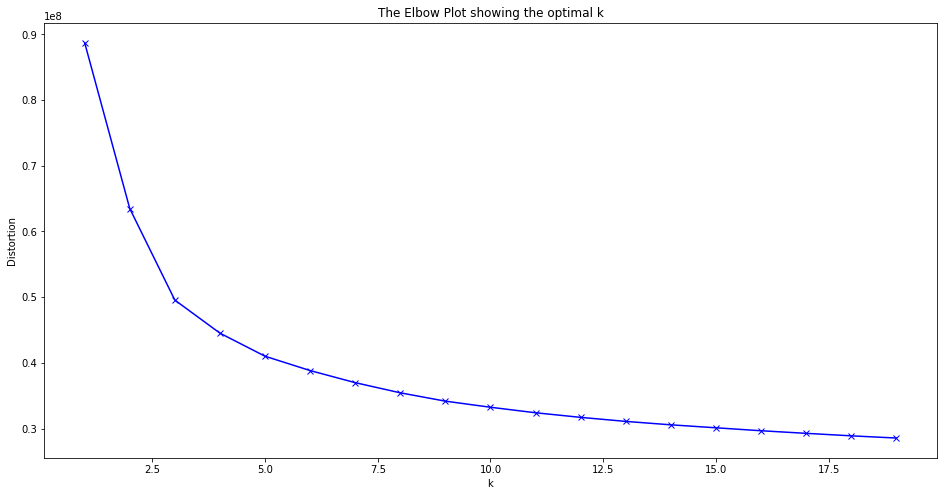

In [0]:
from sklearn.cluster import KMeans

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(n)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Plot showing the optimal k')
plt.show()

In [0]:
l = df_kmeans_new.select(f.collect_list('Position_Group')).first()[0]
m = df_kmeans_new.select(f.collect_list('Agility')).first()[0]
n = df_kmeans_new.select(f.collect_list('Stamina')).first()[0]

X = pd.DataFrame({'Group' : l, 'Agility' : m, 'Stamina' : n})

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X['Group'] = le.fit_transform(X.Group.values)
print(X)

Group Agility Stamina
0 1 91 72
1 1 87 88
2 1 96 81
3 2 79 90
4 1 95 83
5 2 93 89
6 1 82 90
7 0 78 84
8 1 78 78
9 2 70 75
10 0 58 66
11 2 92 78
12 2 82 96
13 1 91 80
14 1 71 89
15 2 90 83
16 2 66 86
17 1 77 92
18 1 86 76
19 0 54 65
20 2 92 83
21 2 91 84
22 2 62 87
23 2 83 70
24 1 94 75
25 1 87 70
26 2 79 92
27 1 92 79
28 2 76 76
29 0 63 66
... ... ... ...
16092 2 31 34
16093 2 60 48
16094 2 61 64
16095 0 49 62
16096 2 51 50
16097 1 53 51
16098 0 42 55
16099 0 56 60
16100 2 53 54
16101 2 57 59
16102 2 63 60
16103 2 77 46
16104 0 68 61
16105 2 55 33
16106 1 67 55
16107 2 31 61
16108 0 55 38
16109 2 56 55
16110 0 55 54
16111 2 55 54
16112 2 60 35
16113 2 58 50
16114 2 53 42
16115 1 64 31
16116 0 39 39
16117 2 60 40
16118 1 38 43
16119 1 50 55
16120 1 52 40
16121 2 55 47

[16122 rows x 3 columns]

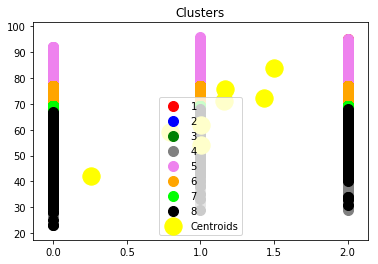

In [0]:
# Applying K-Means
from pyspark.ml.clustering import KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8,init='k-means++', max_iter=300, n_init=10, random_state=0) 
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

X = X.values

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],s=100,c='gray',label='4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1],s=100,c='violet',label='5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5,1],s=100,c='orange',label='6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6,1],s=100,c='lime',label='7')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7,1],s=100,c='black',label='8')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

#Section-3: Predicting the Position Group

In [0]:
#Data Preparation

FEATURES_COL_ = ['Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_new).select('features','Position_Group')
df_class_.show(3)

+--------------------+--------------+
 features|Position_Group|
+--------------------+--------------+
[84.0,95.0,70.0,9...| FWD|
[84.0,94.0,89.0,8...| FWD|
[79.0,87.0,62.0,8...| FWD|
+--------------------+--------------+
only showing top 3 rows

In [0]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
 features| Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
[84.0,95.0,70.0,9...|[5.94528596807297...| FWD|
[84.0,94.0,89.0,8...|[5.94528596807297...| FWD|
[79.0,87.0,62.0,8...|[5.59139989854481...| FWD|
[93.0,82.0,55.0,9...|[6.58228089322364...| MID|
[81.0,84.0,61.0,8...|[5.73295432635608...| FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows

In [0]:
#Assigning values to position group; with Defender being 1, Forward 0 and Midfielder 2
raw_data_ = raw_data.withColumn('label',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))
raw_data_.show()

+--------------------+--------------+--------------------+-----+
 features|Position_Group| Scaled_features|label|
+--------------------+--------------+--------------------+-----+
[84.0,95.0,70.0,9...| FWD|[5.94528596807297...| 0|
[84.0,94.0,89.0,8...| FWD|[5.94528596807297...| 0|
[79.0,87.0,62.0,8...| FWD|[5.59139989854481...| 0|
[93.0,82.0,55.0,9...| MID|[6.58228089322364...| 2|
[81.0,84.0,61.0,8...| FWD|[5.73295432635608...| 0|
[86.0,72.0,55.0,9...| MID|[6.08684039588423...| 2|
[77.0,93.0,77.0,8...| FWD|[5.44984547073355...| 0|
[66.0,60.0,91.0,7...| DEF|[4.67129611777162...| 1|
[62.0,91.0,85.0,8...| FWD|[4.38818726214909...| 0|
[88.0,76.0,54.0,9...| MID|[6.22839482369549...| 2|
[55.0,42.0,92.0,7...| DEF|[3.89274676480968...| 1|
[84.0,76.0,54.0,9...| MID|[5.94528596807297...| 2|
[68.0,65.0,54.0,8...| MID|[4.81285054558288...| 2|
[82.0,84.0,68.0,8...| FWD|[5.80373154026171...| 0|
[75.0,94.0,85.0,8...| FWD|[5.30829104292229...| 0|
[82.0,90.0,84.0,8...| MID|[5.80373154026171...| 2|
[62.0,67.0,68.0,8...| MID|[4.38818726214909...| 2|
[70.0,89.0,89.0,7...| FWD|[4.95440497339414...| 0|
[70.0,93.0,77.0,8...| FWD|[4.95440497339414...| 0|
[58.0,33.0,83.0,5...| DEF|[4.10507840652657...| 1|
+--------------------+--------------+--------------------+-----+
only showing top 20 rows

In [0]:
# Train-Test Evaluation
train, test = raw_data_.randomSplit([0.8, 0.2], seed=12)

In [0]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

rf = RandomForestRegressor(featuresCol="features", maxDepth=2)

# Chain indexer and forest in a Pipeline
pipeline = Pipeline(stages=[rf])

# Train model.  This also runs the indexer
model = pipeline.fit(train)

# Make predictions.
predictions = model.transform(test)

# Select example rows to display.
predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-----+--------------------+
 prediction|label| features|
+------------------+-----+--------------------+
 1.138705264236299| 1|[17.0,19.0,76.0,5...|
 1.138705264236299| 1|[18.0,14.0,70.0,5...|
1.1691201928385533| 1|[18.0,17.0,77.0,5...|
1.1836924351249811| 1|[19.0,37.0,70.0,6...|
 1.138705264236299| 1|[21.0,22.0,74.0,5...|
+------------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.629216

In [0]:
from pyspark.ml.classification import LogisticRegression, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Instantiate the base classifier.
lr = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

# Instantiate the One Vs Rest Classifier.
ovr = OneVsRest(classifier=lr)

# Training the multiclass model
ovrModel = ovr.fit(train)

# Score the model on test data
predictions = ovrModel.transform(test)

# Obtaining the evaluator
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")

# Computing the classification error on test data
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % (accuracy))

Accuracy = 0.849016

#Section-4: Predicting the best possible replacement of a player

In [0]:
# Using Linear Algebra to process data
import pyspark 
from pyspark.sql import SparkSession
import pandas as pd
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pandas_fifa = pd.read_csv("/dbfs/FileStore/tables/data.csv")
print(pandas_fifa.head())

Unnamed: 0 ID ... GKReflexes Release Clause
0 0 158023 ... 8.0 €226.5M
1 1 20801 ... 11.0 €127.1M
2 2 190871 ... 11.0 €228.1M
3 3 193080 ... 94.0 €138.6M
4 4 192985 ... 13.0 €196.4M

[5 rows x 89 columns]

In [0]:
#Data Preparation
features = pandas_fifa.iloc[:, 54:83]
features['Skill Moves'] = pandas_fifa['Skill Moves']

# Applying One Hot Encoding to convert categorical variable work rate having values High, Low and Medium into indicator variable 
wr = pandas_fifa['Work Rate'].str.get_dummies(sep='/ ')

# Concatenating the features and work rate dataframe
features = pd.concat([features, wr], axis=1)
fifa = features

#Removing all the missing values from features
features = features.dropna()
fifa['Name'] = pandas_fifa['Name']

#Removing all the missing values from fifa
fifa = fifa.dropna()
print(features.columns)

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
 'Skill Moves', 'High', 'Low', 'Medium'],
 dtype='object')

In [0]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(features)

In [0]:
%sh pip install classification

Requirement already satisfied: classification in /databricks/conda/envs/databricks-ml/lib/python3.7/site-packages (0.1.0)

In [0]:
from sklearn.neighbors import NearestNeighbors

replacements = NearestNeighbors(n_neighbors=4, algorithm='auto').fit(X)

In [0]:
token = replacements.kneighbors(X)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def suggest(player):
    print('Top 3 players to replace', player, ':' '\n')
    index = get_index(player)
    for i in token[index][1:]:
            print(fifa.iloc[i]['Name'], '\n')

suggest("L. Suárez")

Top 3 players to replace L. Suárez :

R. Lewandowski 

W. Rooney 

M. Arnautović

In [0]:
token = replacements.kneighbors(X)[1]

def get_index(x):
    return fifa[fifa['Name']==x].index.tolist()[0]

def suggest(player):
    print('Top 3 players to replace', player, ':' '\n')
    index = get_index(player)
    for i in token[index][1:]:
            print(fifa.iloc[i]['Name'], '\n')

suggest("Iniesta")

Top 3 players to replace Iniesta :

I. Gündoğan 

Isco 

J. Pastore